# **Intro to Einsum**

Pros
- Convenient and compact
- Stand-in for many tensor ops including matrix mult, element-wise mult, dot product, outer product
- You can even combine all of the above in a single einsum call.
- No need to permute outputs for batch matrix mult

Cons:
- A little confusing
- Can be a little slower since it's not optimized, but in practice we can overcome this (and make it faster) by combining ops in a single call

# **Matrix Multiply**

$$\LARGE{M_{ij} = \Sigma_k \; A_{ik}B_{kj}}$$

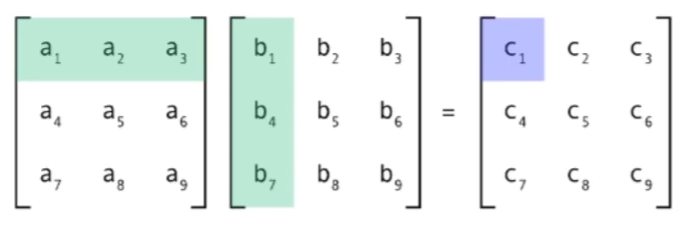

In [ ]:
import numpy as np

A = np.random.randint(5, size=(3,5))
B = np.random.randint(5, size=(5,2))
M = np.empty((3,2))

for i in range(3):
  for j in range(2):
    total = 0
    for k in range(5):
      total += A[i,k]*B[k,j]

    M[i,j] = total

In [ ]:
print(f"""
A: {A}

B: {B}

M1: {M}
""")


A: [[4 4 3 2 1]
 [0 1 3 2 0]
 [4 3 3 3 0]] 

B: [[3 1]
 [4 4]
 [1 3]
 [2 4]
 [4 3]]
      
M1: [[39. 40.]
 [11. 21.]
 [33. 37.]]



$$\LARGE{M_{ij} = A_{ik}B_{kj}}$$

In [ ]:
M2 = np.einsum('ik, kj -> ij', A, B)

In [ ]:
print(f"M2: {M2}")

M2: [[39 40]
 [11 21]
 [33 37]]


# **Outer Product**

$$
{\displaystyle \mathbf {u} ={\begin{bmatrix}u_{1}\\u_{2}\\\vdots \\u_{m}\end{bmatrix}},\quad \mathbf {v} ={\begin{bmatrix}v_{1}\\v_{2}\\\vdots \\v_{n}\end{bmatrix}}}
$$

$${\displaystyle \mathbf {u} \otimes \mathbf {v} =\mathbf {A} ={\begin{bmatrix}u_{1}v_{1}&u_{1}v_{2}&\dots &u_{1}v_{n}\\u_{2}v_{1}&u_{2}v_{2}&\dots &u_{2}v_{n}\\\vdots &\vdots &\ddots &\vdots \\u_{m}v_{1}&u_{m}v_{2}&\dots &u_{m}v_{n}\end{bmatrix}}}$$

In [ ]:
import numpy as np

u = np.random.randint(5, size=(5))
v = np.random.randint(5, size=(5))
A = np.empty((5,5))

In [ ]:
for i in range(5):
  for j in range(3):
    total = 0
    total += u[i] * v[j]
    A[i,j] = total

In [ ]:
print(f"""
u: {u}

v: {v}

A: {A}
""")


u: [2 1 2 0 4]
      
v: [2 4 4 2 3]
      
A: [[ 4  8  8  4  6]
 [ 2  4  4  2  3]
 [ 4  8  8  4  6]
 [ 0  0  0  0  0]
 [ 8 16 16  8 12]]



In [ ]:
A = np.einsum('i,j->ij', u, v)

In [ ]:
print(f"A: {A}")

A: [[ 4  8  8  4  6]
 [ 2  4  4  2  3]
 [ 4  8  8  4  6]
 [ 0  0  0  0  0]
 [ 8 16 16  8 12]]


# **Einsum Rules**
1. Repeating letters, such as k, indicate all of the k values will be multiplied and those products will be the output. It should be equal length for both inputs.
2. Omitting a letter means that axis will be summed.
3. We can return the unsummed axes in any order.

In [ ]:
np.einsum('ij,jk->ik', A, B)

array([[52, 58],
       [78, 87],
       [52, 58],
       [ 0,  0],
       [52, 58]])

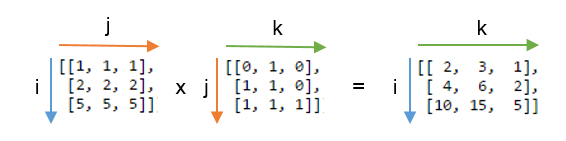

In [ ]:
x = np.ones(3)
sum_x = np.einsum('i->', x)

print(sum_x)

3.0


In [ ]:
x = np.ones((1,3))
print(x.shape)

x = np.einsum('ij->ji', x)

print(x.shape)

(1, 3)
(3, 1)


In [ ]:
x = np.ones((2,3,5))
print(x.shape)

x = np.einsum('ijk->kji', x)

print(x.shape)

(2, 3, 5)
(5, 3, 2)


# **Some More Operations**

In [ ]:
import torch

In [ ]:
# Permuting Tensors
x = torch.randint(0, 5, (2,3))
print(x)

tensor([[3, 4, 0],
        [4, 3, 1]])


In [ ]:
print(torch.einsum('ij->ji', x))

tensor([[3, 4],
        [4, 3],
        [0, 1]])


In [ ]:
# Summation
print(torch.einsum('ij->', x))

tensor(15)


In [ ]:
# Column Sum
print(torch.einsum('ij->j', x))

tensor([7, 7, 1])


In [ ]:
# Row Sum
print(torch.einsum('ij->i', x))

tensor([7, 8])


In [ ]:
# Matrix-Vector Multiply
v = torch.randint(0, 5, (1,3))
v

tensor([[2, 1, 3]])

In [ ]:
x

tensor([[3, 4, 0],
        [4, 3, 1]])

In [ ]:
torch.einsum('ij, kj -> ik', x, v)

tensor([[10],
        [14]])

In [ ]:
# Matrix-Matrix Multiplication
torch.einsum("ij, kj -> ik", x, x) # (2,3) @ (3,2) --> (2,2)

tensor([[25, 24],
        [24, 26]])

In [ ]:
# Dot product first row with first row of matrix
torch.einsum('i,i->', x[0], x[0])

tensor(25)

In [ ]:
# Dot product with matrix
torch.einsum('ij, ij ->', x, x)

tensor(51)

In [ ]:
# Hadamard Product (element-wise mult)
torch.einsum('ij, ij -> ij', x, x)

tensor([[ 9, 16,  0],
        [16,  9,  1]])

# **Einops**

In [ ]:
! git clone https://github.com/arogozhnikov/einops.git

Cloning into 'einops'...
remote: Enumerating objects: 3530, done.
remote: Counting objects: 100% (1046/1046), done.
remote: Compressing objects: 100% (386/386), done.
remote: Total 3530 (delta 750), reused 776 (delta 646), pack-reused 2484
Receiving objects: 100% (3530/3530), 6.32 MiB | 8.02 MiB/s, done.
Resolving deltas: 100% (2098/2098), done.


In [ ]:
%cd einops_repo/docs

/content/einops_repo/docs


In [ ]:
import numpy
from utils import display_np_arrays_as_images
display_np_arrays_as_images()

In [ ]:
ims = numpy.load('./resources/test_images.npy', allow_pickle=False)
# There are 6 images of shape 96x96 with 3 color channels packed into tensor
print(ims.shape, ims.dtype)

(6, 96, 96, 3) float64


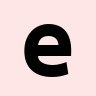

In [ ]:
# display the first image (whole 4d tensor can't be rendered)
ims[0]

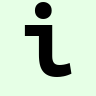

In [ ]:
# second image in a batch
ims[1]

In [ ]:
! pip install einops

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 kB 1.8 MB/s eta 0:00:00


In [ ]:
# we'll use three operations
from einops import rearrange, reduce, repeat

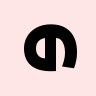

In [ ]:
# rearrange, as its name suggests, rearranges elements
# below we swapped height and width.
# In other words, transposed first two axes (dimensions)
rearrange(ims[0], 'h w c -> w h c')

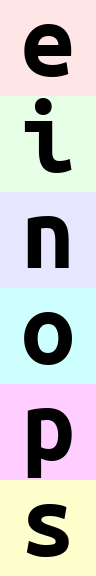

In [ ]:
# einops allows seamlessly composing batch and height to a new height dimension
# We just rendered all images by collapsing to 3d tensor!
rearrange(ims, 'b h w c -> (b h) w c')

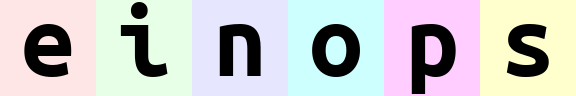

In [ ]:
# or compose a new dimension of batch and width
rearrange(ims, 'b h w c -> h (b w) c')

In [ ]:
# resulting dimensions are computed very simply
# length of newly composed axis is a product of components
# [6, 96, 96, 3] -> [96, (6 * 96), 3]
rearrange(ims, 'b h w c -> h (b w) c').shape

(96, 576, 3)

In [ ]:
# we can compose more than two axes.
# let's flatten 4d array into 1d, resulting array has as many elements as the original
rearrange(ims, 'b h w c -> (b h w c)').shape

(165888,)

# **Axis Decomposition**

In [ ]:
# decomposition is the inverse process - represent an axis as a combination of new axes
# several decompositions possible, so b1=2 is to decompose 6 to b1=2 and b2=3
rearrange(ims, '(b1 b2) h w c -> b1 b2 h w c ', b1=2).shape

(2, 3, 96, 96, 3)

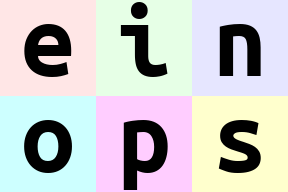

In [ ]:
# finally, combine composition and decomposition:
rearrange(ims, '(b1 b2) h w c -> (b1 h) (b2 w) c ', b1=2)

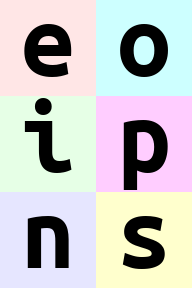

In [ ]:
# slightly different composition: b1 is merged with width, b2 with height
# ... so letters are ordered by w then by h
rearrange(ims, '(b1 b2) h w c -> (b2 h) (b1 w) c ', b1=2)

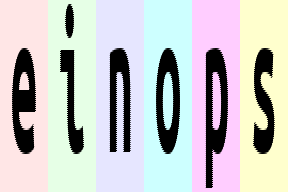

In [ ]:
# move part of width dimension to height.
# we should call this width-to-height as image width shrunk by 2 and height doubled.
# but all pixels are the same!
# Can you write reverse operation (height-to-width)?
rearrange(ims, 'b h (w w2) c -> (h w2) (b w) c', w2=2)

# **Axis Order Matters**

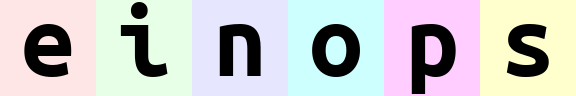

In [ ]:
# compare with the next example
rearrange(ims, 'b h w c -> h (b w) c')

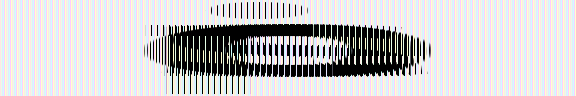

In [ ]:
# order of axes in composition is different
# rule is just as for digits in the number: leftmost digit is the most significant,
# while neighboring numbers differ in the rightmost axis.

# you can also think of this as lexicographic sort
rearrange(ims, 'b h w c -> h (w b) c')

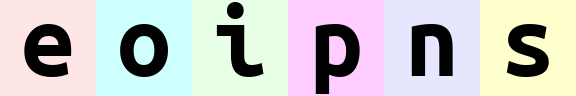

In [ ]:
# what if b1 and b2 are reordered before composing to width?
rearrange(ims, '(b1 b2) h w c -> h (b1 b2 w) c ', b1=2) # produces 'einops'
rearrange(ims, '(b1 b2) h w c -> h (b2 b1 w) c ', b1=2) # produces 'eoipns'

# einops.reduce

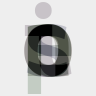

In [ ]:
# average over batch
reduce(ims, 'b h w c -> h w c', 'mean')

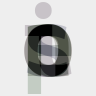

In [ ]:
# the previous is identical to familiar:
ims.mean(axis=0)
# but is so much more readable

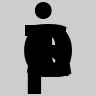

In [ ]:
# Example of reducing of several axes
# besides mean, there are also min, max, sum, prod
reduce(ims, 'b h w c -> h w', 'min')

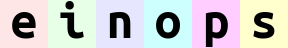

In [ ]:
# this is mean-pooling with 2x2 kernel
# image is split into 2x2 patches, each patch is averaged
reduce(ims, 'b (h h2) (w w2) c -> h (b w) c', 'mean', h2=2, w2=2)

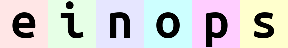

In [ ]:
# max-pooling is similar
# result is not as smooth as for mean-pooling
reduce(ims, 'b (h h2) (w w2) c -> h (b w) c', 'max', h2=2, w2=2)

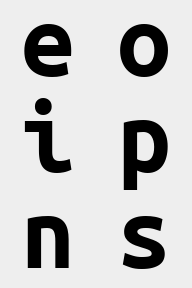

In [ ]:
# yet another example. Can you compute result shape?
reduce(ims, '(b1 b2) h w c -> (b2 h) (b1 w)', 'mean', b1=2)

# einops.repeat

In [ ]:
# repeat along a new axis. New axis can be placed anywhere
repeat(ims[0], 'h w c -> h new_axis w c', new_axis=5).shape

(96, 5, 96, 3)

In [ ]:
# shortcut
repeat(ims[0], 'h w c -> h 5 w c').shape

(96, 5, 96, 3)

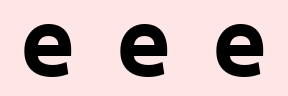

In [ ]:
# repeat along w (existing axis)
repeat(ims[0], 'h w c -> h (repeat w) c', repeat=3)

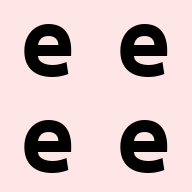

In [ ]:
# repeat along two existing axes
repeat(ims[0], 'h w c -> (2 h) (2 w) c')

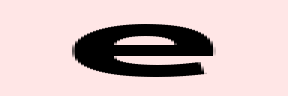

In [ ]:
# order of axes matters as usual - you can repeat each element (pixel) 3 times
# by changing order in parenthesis
repeat(ims[0], 'h w c -> h (w repeat) c', repeat=3)